<a href="https://colab.research.google.com/github/Ghanifhakbar/GDGOC-PERT2/blob/main/data_3(LTP_csv).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [694]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://raw.githubusercontent.com/Ardavaa/GDG-feature-eng-data-prep/refs/heads/main/dataset-penugasan/MBP.csv')
df.head(10)

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,"POCO C50 (Royal Blue, 32 GB)",4.2,"33,561",2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649",2023-06-17
1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,"77,128",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",2023-06-17
2,"POCO C51 (Royal Blue, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17
3,"POCO C55 (Cool Blue, 64 GB)",4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",2023-06-17
4,"POCO C51 (Power Black, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17
5,"POCO M4 5G (Power Black, 64 GB)",4.2,"77,128",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",2023-06-17
6,"POCO C55 (Power Black, 64 GB)",4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",2023-06-17
7,"POCO C55 (Forest Green, 64 GB)",4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",2023-06-17
8,"POCO C55 (Cool Blue, 128 GB)",4.1,"13,647",6 GB RAM,128 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹9,249",2023-06-17
9,"POCO M4 5G (Yellow, 128 GB)",4.2,"40,525",6 GB RAM,128 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹13,999",2023-06-17


In [695]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Phone Name         1836 non-null   object 
 1   Rating ?/5         1836 non-null   float64
 2   Number of Ratings  1836 non-null   object 
 3   RAM                1836 non-null   object 
 4   ROM/Storage        1662 non-null   object 
 5   Back/Rare Camera   1827 non-null   object 
 6   Front Camera       1435 non-null   object 
 7   Battery            1826 non-null   object 
 8   Processor          1781 non-null   object 
 9   Price in INR       1836 non-null   object 
 10  Date of Scraping   1836 non-null   object 
dtypes: float64(1), object(10)
memory usage: 157.9+ KB


In [696]:
cols_to_remove = ['Phone Name', 'Date of Scraping']
df.drop(cols_to_remove, axis=1, inplace=True)

df.head(10)

,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR
0,4.2,"33,561",2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649"
1,4.2,"77,128",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999"
2,4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999"
3,4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749"
4,4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999"
5,4.2,"77,128",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999"
6,4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749"
7,4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749"
8,4.1,"13,647",6 GB RAM,128 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹9,249"
9,4.2,"40,525",6 GB RAM,128 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹13,999"


In [697]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating ?/5         1836 non-null   float64
 1   Number of Ratings  1836 non-null   object 
 2   RAM                1836 non-null   object 
 3   ROM/Storage        1662 non-null   object 
 4   Back/Rare Camera   1827 non-null   object 
 5   Front Camera       1435 non-null   object 
 6   Battery            1826 non-null   object 
 7   Processor          1781 non-null   object 
 8   Price in INR       1836 non-null   object 
dtypes: float64(1), object(8)
memory usage: 129.2+ KB


In [698]:
df['Battery'] = df['Battery'].str.extract(r'(\d+) mAh')  # Extract capacity
df['Battery'] = pd.to_numeric(df['Battery'], errors='coerce')  # Convert to numeric

df['Number of Ratings'] = df['Number of Ratings'].str.replace(',', '', regex=False)
df['Number of Ratings'] = pd.to_numeric(df['Number of Ratings'], errors='coerce')

df['Price in INR'] = df['Price in INR'].str.replace('₹', '', regex=False).str.replace(',', '', regex=False)
df['Price in INR'] = pd.to_numeric(df['Price in INR'], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating ?/5         1836 non-null   float64
 1   Number of Ratings  1836 non-null   int64  
 2   RAM                1836 non-null   object 
 3   ROM/Storage        1662 non-null   object 
 4   Back/Rare Camera   1827 non-null   object 
 5   Front Camera       1435 non-null   object 
 6   Battery            1812 non-null   float64
 7   Processor          1781 non-null   object 
 8   Price in INR       1836 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 129.2+ KB


In [699]:
df.isna().sum()

,0
Rating ?/5,0
Number of Ratings,0
RAM,0
ROM/Storage,174
Back/Rare Camera,9
Front Camera,401
Battery,24
Processor,55
Price in INR,0


In [700]:
df.duplicated().sum()

648

In [701]:
# drop duplicated rows
df.drop_duplicates(inplace=True)

df.duplicated().sum()

0

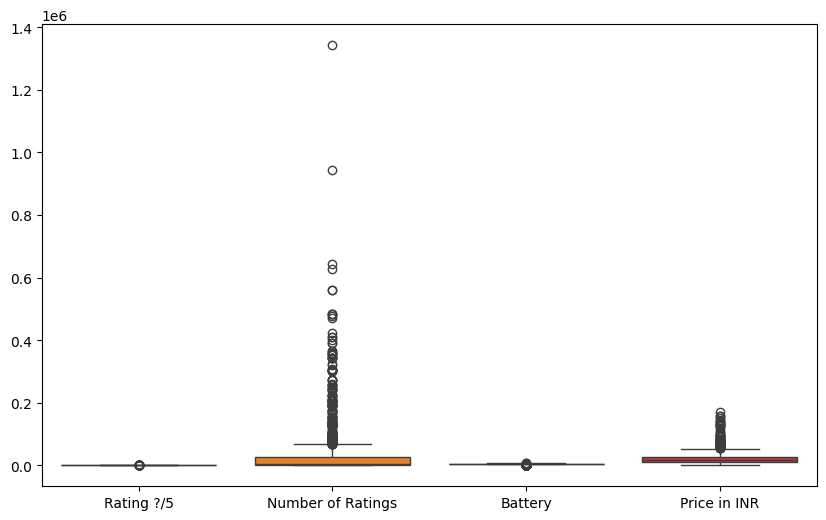

In [702]:
num_cols = ['Rating ?/5', 'Number of Ratings', 'RAM','ROM/Storage','Battery','Price in INR']
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[num_cols])
plt.show()

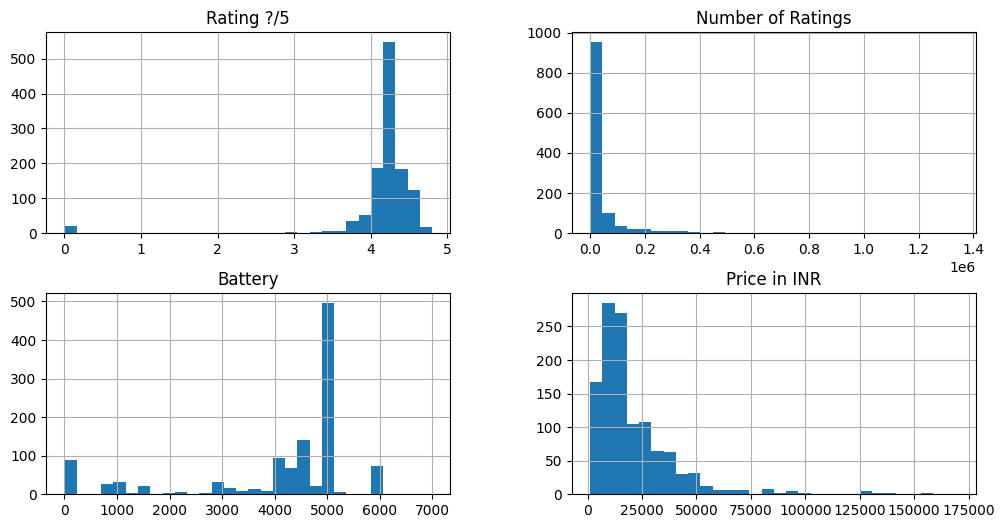

In [703]:
df[num_cols].hist(bins=30, figsize=(12, 6))
plt.show()

In [704]:
df.head(5
        )

,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR
0,4.2,33561,2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000.0,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...",5649
1,4.2,77128,4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000.0,Mediatek Dimensity 700 Processor,11999
2,4.3,15175,4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000.0,Helio G36 Processor,6999
3,4.2,22621,4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000.0,Mediatek Helio G85 Processor,7749
8,4.1,13647,6 GB RAM,128 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000.0,Mediatek Helio G85 Processor,9249


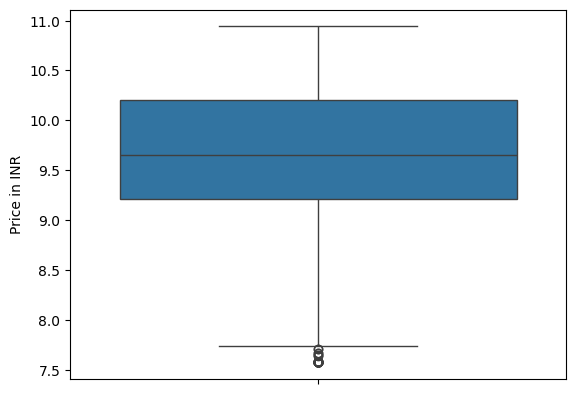

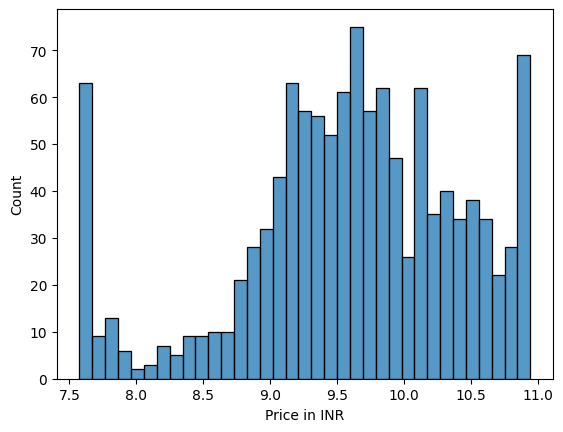

In [705]:
# Pertahankan semua nilai karena mereka relevan dan valid dalam konteks smartphone, kecuali price in INR
import scipy.stats as stats

# Transformasi logaritmik
df['Price in INR'] = np.log(df['Price in INR'])

# Winsorizing
df['Price in INR'] = stats.mstats.winsorize(df['Price in INR'], limits=[0.05, 0.05])  # Batasi 5% nilai terendah dan 5% nilai tertinggi

# Visualisasi setelah Winsorizing
sns.boxplot(df['Price in INR'])
plt.show()

sns.histplot(df['Price in INR'], bins=35)
plt.show()

In [706]:
# Split data into training and testing sets
X = df.drop('Price in INR', axis=1)
y = df['Price in INR']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((950, 8), (238, 8), (950,), (238,))

In [707]:
df.isna().sum()

,0
Rating ?/5,0
Number of Ratings,0
RAM,0
ROM/Storage,81
Back/Rare Camera,8
Front Camera,374
Battery,22
Processor,49
Price in INR,0


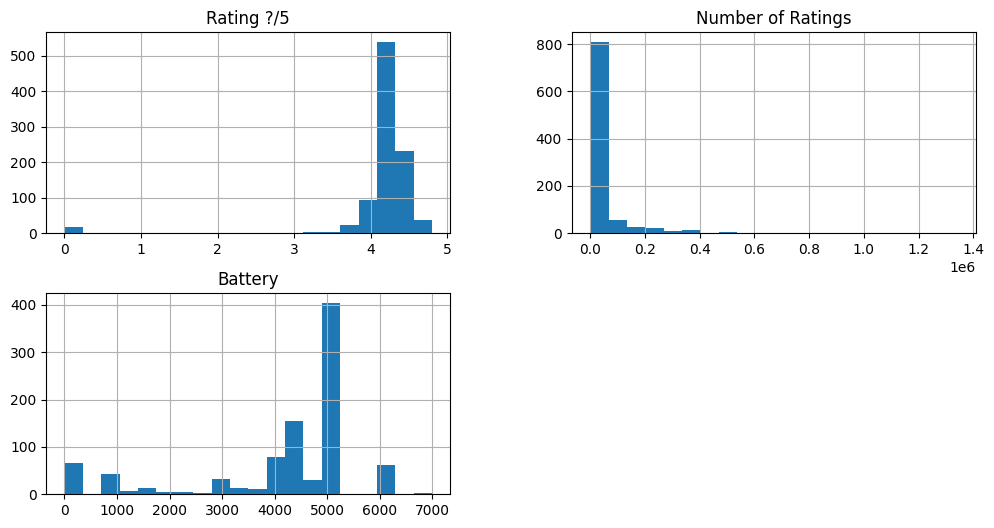

In [708]:
z =['Rating ?/5', 'Number of Ratings','Battery']
X_train[z].hist(bins=20, figsize=(12, 6))
plt.show()

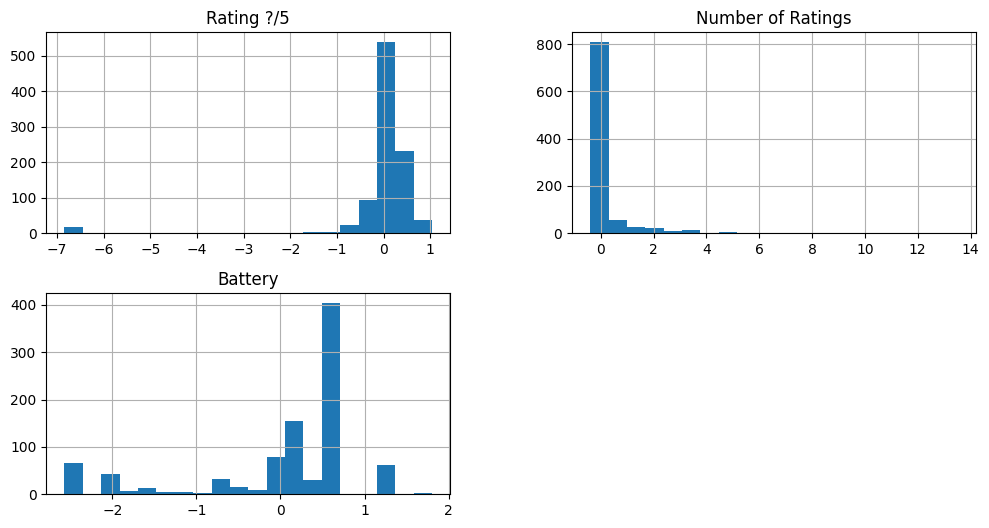

In [709]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[z] = scaler.fit_transform(X_train[z])
X_test[z] = scaler.transform(X_test[z])

X_train[HAHA].hist(bins=20, figsize=(12, 6))
plt.show()

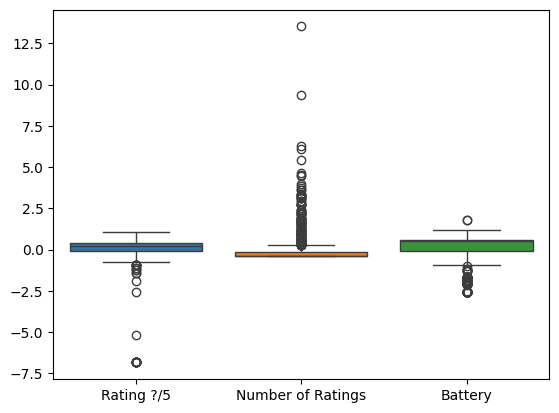

In [710]:
sns.boxplot(data=X_train[z])
plt.show()

In [711]:
X_train.isna().sum() / len(X_train)

,0
Rating ?/5,0.000000
Number of Ratings,0.000000
RAM,0.000000
ROM/Storage,0.070526
Back/Rare Camera,0.006316
Front Camera,0.314737
Battery,0.020000
Processor,0.034737


In [712]:
X_test.isna().sum() / len(X_test)

,0
Rating ?/5,0.000000
Number of Ratings,0.000000
RAM,0.000000
ROM/Storage,0.058824
Back/Rare Camera,0.008403
Front Camera,0.315126
Battery,0.012605
Processor,0.067227


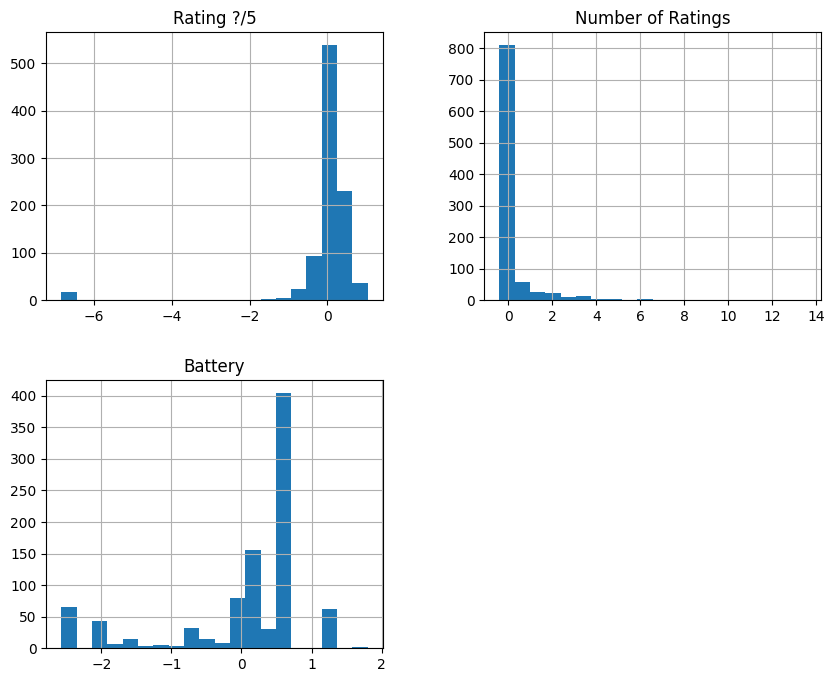

In [713]:
X_train[z].hist(bins=20, figsize=(10, 8))
plt.show()

In [714]:
X_train[z].skew()

,0
Rating ?/5,-5.889376
Number of Ratings,5.564286
Battery,-1.513399


In [715]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train[z].fillna(X_train[z].median(), inplace=True)
X_test[z].fillna(X_test[z].median(), inplace=True)


X_train.isna().sum() / len(X_train)

,0
Rating ?/5,0.000000
Number of Ratings,0.000000
RAM,0.000000
ROM/Storage,0.070526
Back/Rare Camera,0.006316
Front Camera,0.314737
Battery,0.020000
Processor,0.034737


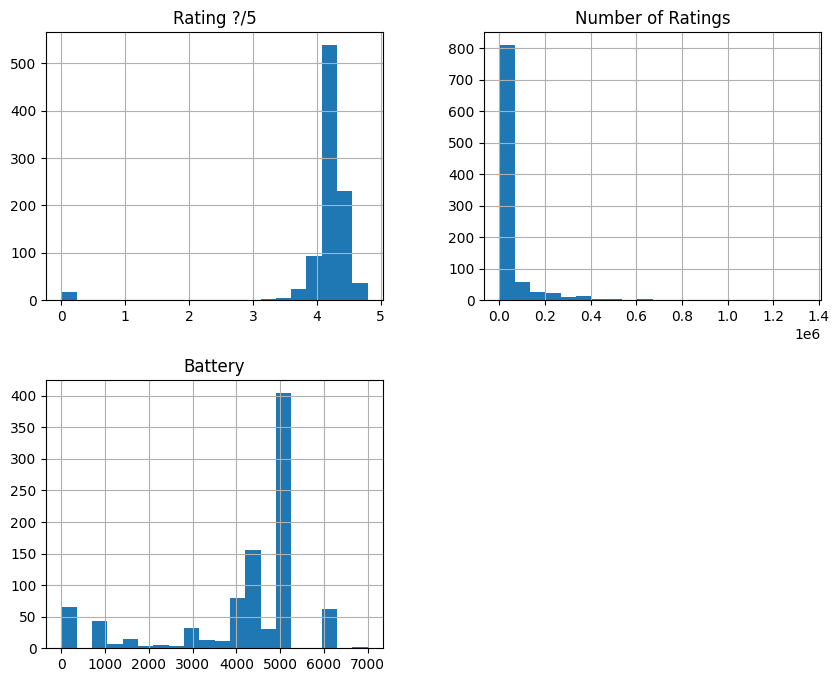

In [716]:
X_train[z].hist(bins=20, figsize=(10, 8))
plt.show()

In [717]:
print(X_test.isna().sum())

Rating ?/5            0
Number of Ratings     0
RAM                   0
ROM/Storage          14
Back/Rare Camera      2
Front Camera         75
Battery               3
Processor            16
dtype: int64


In [718]:
categorical_cols = X_train.select_dtypes(include=['object']).columns

print('-'*50)
for col in categorical_cols:
    print(X_train[col].value_counts())
    print('-'*50)

--------------------------------------------------
RAM
8 GB RAM                      231
4 GB RAM                      186
6 GB RAM                      151
3 GB RAM                      101
2 GB RAM                       58
12 GB RAM                      58
4 MB RAM                       41
NA ROM                         11
128 GB ROM                     11
1 GB RAM                       11
256 GB ROM                     10
512 GB ROM                      8
64 GB ROM                       8
cm Display                      6
8 MB RAM                        5
32 MB RAM                       5
16 GB RAM                       5
64 MB RAM                       4
512 MB RAM                      4
128 MB RAM                      4
0.046875 GB RAM                 4
16 GB ROM                       3
16 MB RAM                       2
1 TB ROM                        2
0 MB ROM                        2
16 MB ROM                       2
Expandable Upto 16 GB           2
1 MB RAM                   

In [719]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
le = LabelEncoder()

# Kolom-kolom kategorikal yang akan di-encode
categorical_cols = ['RAM', 'ROM/Storage', 'Back/Rare Camera', 'Front Camera','Processor']

# Melakukan label encoding untuk setiap kolom
for col in categorical_cols:
    # Combine unique values from both train and test sets
    all_values = pd.concat([X_train[col], X_test[col]]).unique()

    # Fit the encoder on all unique values
    le.fit(all_values)

    # Transform both train and test sets
    X_train[col] = le.transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

# Menampilkan hasil encoding (opsional)
X_train.head()

,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor
606,0.0,0,31,5,55,33,5000.0,53
1151,4.4,210232,20,14,55,26,3120.0,223
1010,4.3,6342,31,5,55,33,5000.0,36
563,4.2,3489,25,20,138,33,6000.0,54
1207,4.2,6800,36,5,21,12,4500.0,182


In [720]:

X_train.columns

Index(['Rating ?/5', 'Number of Ratings', 'RAM', 'ROM/Storage',
       'Back/Rare Camera', 'Front Camera', 'Battery', 'Processor'],
      dtype='object')

In [721]:
df['Price in INR'].value_counts()

,count
Price in INR,
10.941996,60
7.575072,60
9.210240,27
9.305560,22
9.472628,22
...,...
9.192176,1
9.825418,1
9.841506,1


In [722]:
print(f'Train Label  \n{pd.Series(y_train).value_counts()}')
print()
print(f'Test Label \n{pd.Series(y_test).value_counts()}')

Train Label  
Price in INR
10.941996    49
7.575072     47
9.210240     21
9.305560     18
9.798071     17
             ..
8.516993      1
10.819698     1
9.760310      1
8.411610      1
9.219300      1
Name: count, Length: 380, dtype: int64

Test Label 
Price in INR
7.575072     13
10.941996    11
9.210240      6
9.546741      6
9.615739      6
             ..
9.581835      1
10.819578     1
9.851615      1
9.661352      1
10.308686     1
Name: count, Length: 145, dtype: int64


In [723]:
X_train

,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor
606,0.0,0,31,5,55,33,5000.0,53
1151,4.4,210232,20,14,55,26,3120.0,223
1010,4.3,6342,31,5,55,33,5000.0,36
563,4.2,3489,25,20,138,33,6000.0,54
1207,4.2,6800,36,5,21,12,4500.0,182
...,...,...,...,...,...,...,...,...
1606,4.4,596,36,13,24,33,5000.0,85
1658,4.6,11,31,5,72,20,3340.0,112
1700,4.3,104,3,21,173,3,3000.0,130
1364,3.8,3013,34,6,26,33,NaN,17


In [724]:
# merge label with feature
X_train['Price in INR'] = y_train
X_test['Price in INR'] = y_test

In [725]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 950 entries, 606 to 1695
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating ?/5         950 non-null    float64
 1   Number of Ratings  950 non-null    int64  
 2   RAM                950 non-null    int64  
 3   ROM/Storage        950 non-null    int64  
 4   Back/Rare Camera   950 non-null    int64  
 5   Front Camera       950 non-null    int64  
 6   Battery            931 non-null    float64
 7   Processor          950 non-null    int64  
 8   Price in INR       950 non-null    float64
dtypes: float64(3), int64(6)
memory usage: 74.2 KB


In [726]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 238 entries, 629 to 1085
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating ?/5         238 non-null    float64
 1   Number of Ratings  238 non-null    int64  
 2   RAM                238 non-null    int64  
 3   ROM/Storage        238 non-null    int64  
 4   Back/Rare Camera   238 non-null    int64  
 5   Front Camera       238 non-null    int64  
 6   Battery            235 non-null    float64
 7   Processor          238 non-null    int64  
 8   Price in INR       238 non-null    float64
dtypes: float64(3), int64(6)
memory usage: 18.6 KB


In [727]:
X_train.drop_duplicates(inplace=True)
X_test.drop_duplicates(inplace=True)


In [728]:

for col in ['Rating ?/5', 'Number of Ratings', 'Battery']:
    median_val_train = X_train[col].median()
    X_train[col].fillna(median_val_train, inplace=True)

    median_val_test = X_test[col].median()
    X_test[col].fillna(median_val_test, inplace=True)


In [729]:
z

['Rating ?/5', 'Number of Ratings', 'Battery']

In [730]:
print("Train missing data:", X_train.isna().sum().sum(), "\nTest missing data:", X_test.isna().sum().sum())
print()
print("Train duplicated data:", X_train.duplicated().sum(), "\nTest duplicated data:", X_test.duplicated().sum())

Train missing data: 0 
Test missing data: 0

Train duplicated data: 0 
Test duplicated data: 0
